In [1]:
import numpy as np

from utils import Wishart_matrix
from aiirw import AI_IRW

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time

### Simulated data

In [3]:
np.random.seed(0)
n, d = (10000,2)
n_test = 10000
mu = np.zeros(d) + 5
sigma = Wishart_matrix(d)

X = np.random.multivariate_normal(mu,sigma,n)
Y = np.random.multivariate_normal(mu,sigma,n_test)

colors = [cm.viridis_r(x)
            for x in np.linspace(0, 1, n_test) ]

## Affine-Invariant Integrated Rank-Weighted depth (AI-IRW) with sample covariance (SC) estimator

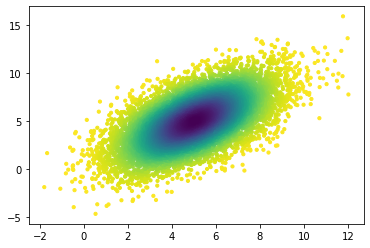

CPU times: user 3.34 s, sys: 161 ms, total: 3.5 s
Wall time: 2.53 s


In [15]:
%%time
score_aiirw = AI_IRW(X,AI=True, X_test=Y, n_dirs=1000)
rank_aiirw = np.argsort(score_aiirw)
plt.scatter(Y[rank_aiirw,0], Y[rank_aiirw,1], s=10, c=colors, cmap='viridis')
plt.show()

## Affine-Invariant Integrated Rank-Weighted depth (AI-IRW) with Minimum Covariance Determinant (MCD) estimator

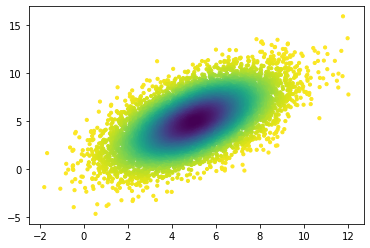

CPU times: user 4.92 s, sys: 155 ms, total: 5.07 s
Wall time: 4.15 s


In [16]:
%%time
score_aiirw = AI_IRW(X,AI=True, robust=True, X_test=Y, n_dirs=1000)
rank_aiirw = np.argsort(score_aiirw)
plt.scatter(Y[rank_aiirw,0], Y[rank_aiirw,1], s=10, c=colors, cmap='viridis')
plt.show()

## Integrated Rank-Weighted depth (IRW)

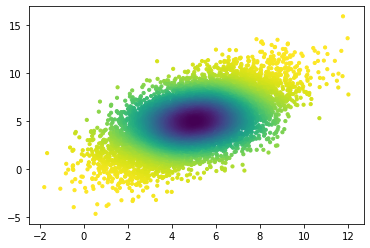

CPU times: user 3.34 s, sys: 150 ms, total: 3.49 s
Wall time: 2.54 s


In [14]:
%%time
score_irw = AI_IRW(X,AI=False, X_test=Y, n_dirs=1000)
rank_irw = np.argsort(score_irw)
plt.scatter(Y[rank_irw,0], Y[rank_irw,1], s=10, c=colors, cmap='viridis')
plt.show()